<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [59]:
df = pd.read_csv("car_dataset.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Data Preparation

In [60]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [62]:
df.shape

(301, 9)

In [63]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [64]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [66]:
df.Selling_Price.value_counts()

0.60     8
0.45     8
5.25     7
4.50     7
4.75     6
        ..
19.99    1
4.35     1
0.80     1
0.27     1
7.20     1
Name: Selling_Price, Length: 156, dtype: int64

In [67]:
df.Present_Price.value_counts()

9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
9.29      1
92.60     1
13.70     1
1.17      1
0.65      1
Name: Present_Price, Length: 147, dtype: int64

In [68]:
df.Kms_Driven.value_counts()

15000     9
45000     9
35000     5
25000     5
50000     5
         ..
1000      1
500000    1
11800     1
5400      1
4100      1
Name: Kms_Driven, Length: 206, dtype: int64

In [69]:
df.Car_Name .value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Hyosung GT250R               1
corolla                      1
Royal Enfield Bullet 350     1
TVS Sport                    1
Bajaj Avenger 150 street     1
Name: Car_Name, Length: 98, dtype: int64

In [70]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [71]:
X = df.drop("Selling_Price", axis =1)
y = df["Selling_Price"]

In [72]:
X

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,city,2016,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,12.50,9000,Diesel,Dealer,Manual,0


In [73]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [74]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [79]:
df.columns=df.columns.str.lower()

In [80]:
df.columns

Index(['car_name', 'year', 'selling_price', 'present_price', 'kms_driven',
       'fuel_type', 'seller_type', 'transmission', 'owner'],
      dtype='object')

In [81]:
df.fuel_type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [82]:
pd.get_dummies(df.fuel_type)

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


In [94]:
df2=pd.get_dummies(df.fuel_type)
df2

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


In [95]:
df3=df.copy()

In [103]:
df=pd.concat([df,df2],axis=1)
df

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Petrol,1,1,0,0,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,1,1,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,1,1,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,1,1,0,0,0,1
4,swift,2014,4.60,6.87,42450,Diesel,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,1,1,0,0,1,0
297,brio,2015,4.00,5.90,60000,Petrol,1,1,0,0,0,1
298,city,2009,3.35,11.00,87934,Petrol,1,1,0,0,0,1
299,city,2017,11.50,12.50,9000,Diesel,1,1,0,0,1,0


In [104]:
df.transmission.unique()

array([1], dtype=int64)

In [105]:
 df.transmission=df.transmission.map(lambda x: 0 if x=="Automatic" else 1)

In [106]:
 df.transmission.unique()

array([1], dtype=int64)

In [107]:
df.seller_type=df.seller_type.map(lambda x : 0 if x== "Dealer" else 1)

In [108]:
df.seller_type.unique()

array([1], dtype=int64)

In [110]:
df.drop("CNG",axis=1)

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Petrol,1,1,0,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,1,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,1,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,1,1,0,0,1
4,swift,2014,4.60,6.87,42450,Diesel,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,1,1,0,1,0
297,brio,2015,4.00,5.90,60000,Petrol,1,1,0,0,1
298,city,2009,3.35,11.00,87934,Petrol,1,1,0,0,1
299,city,2017,11.50,12.50,9000,Diesel,1,1,0,1,0


In [111]:
df.drop("fuel_type",axis=1,inplace=True)

In [112]:
df.columns

Index(['car_name', 'year', 'selling_price', 'present_price', 'kms_driven',
       'seller_type', 'transmission', 'owner', 'CNG', 'Diesel', 'Petrol'],
      dtype='object')

In [29]:
df.head()

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,0,1,0
1,sx4,2013,4.75,9.54,43000,Diesel,0,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,0,1,0
3,wagon r,2011,2.85,4.15,5200,Petrol,0,1,0
4,swift,2014,4.60,6.87,42450,Diesel,0,1,0


In [32]:
df.car_name.nunique()

98

### Features and target variable

In [113]:
df.head()

,car_name,year,selling_price,present_price,kms_driven,seller_type,transmission,owner,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,1,1,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,1,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,1,1,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,1,0,0,1,0


In [115]:
df.car_name.nunique()

98

In [118]:
X = df.drop(["selling_price","car_name"] , axis =1)
X1= df.drop("selling_price", axis =1)

In [119]:
y = df["selling_price"]

### Splitting data into training and testing

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##  Model Building (Linear Regression)

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
model=LinearRegression()

In [132]:
model.fit(X_train,y_train)

LinearRegression()

<AxesSubplot:>

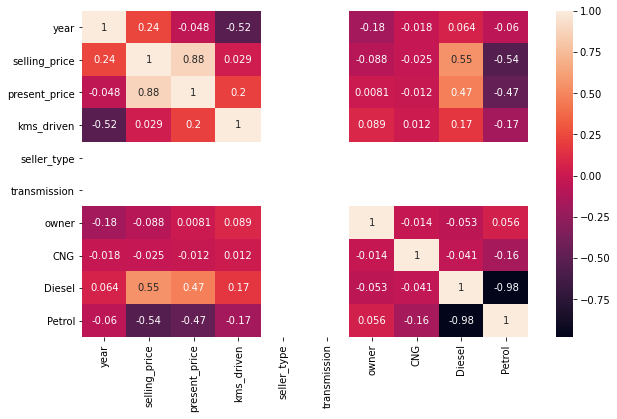

In [135]:
sns.heatmap(df.corr(),annot=True)

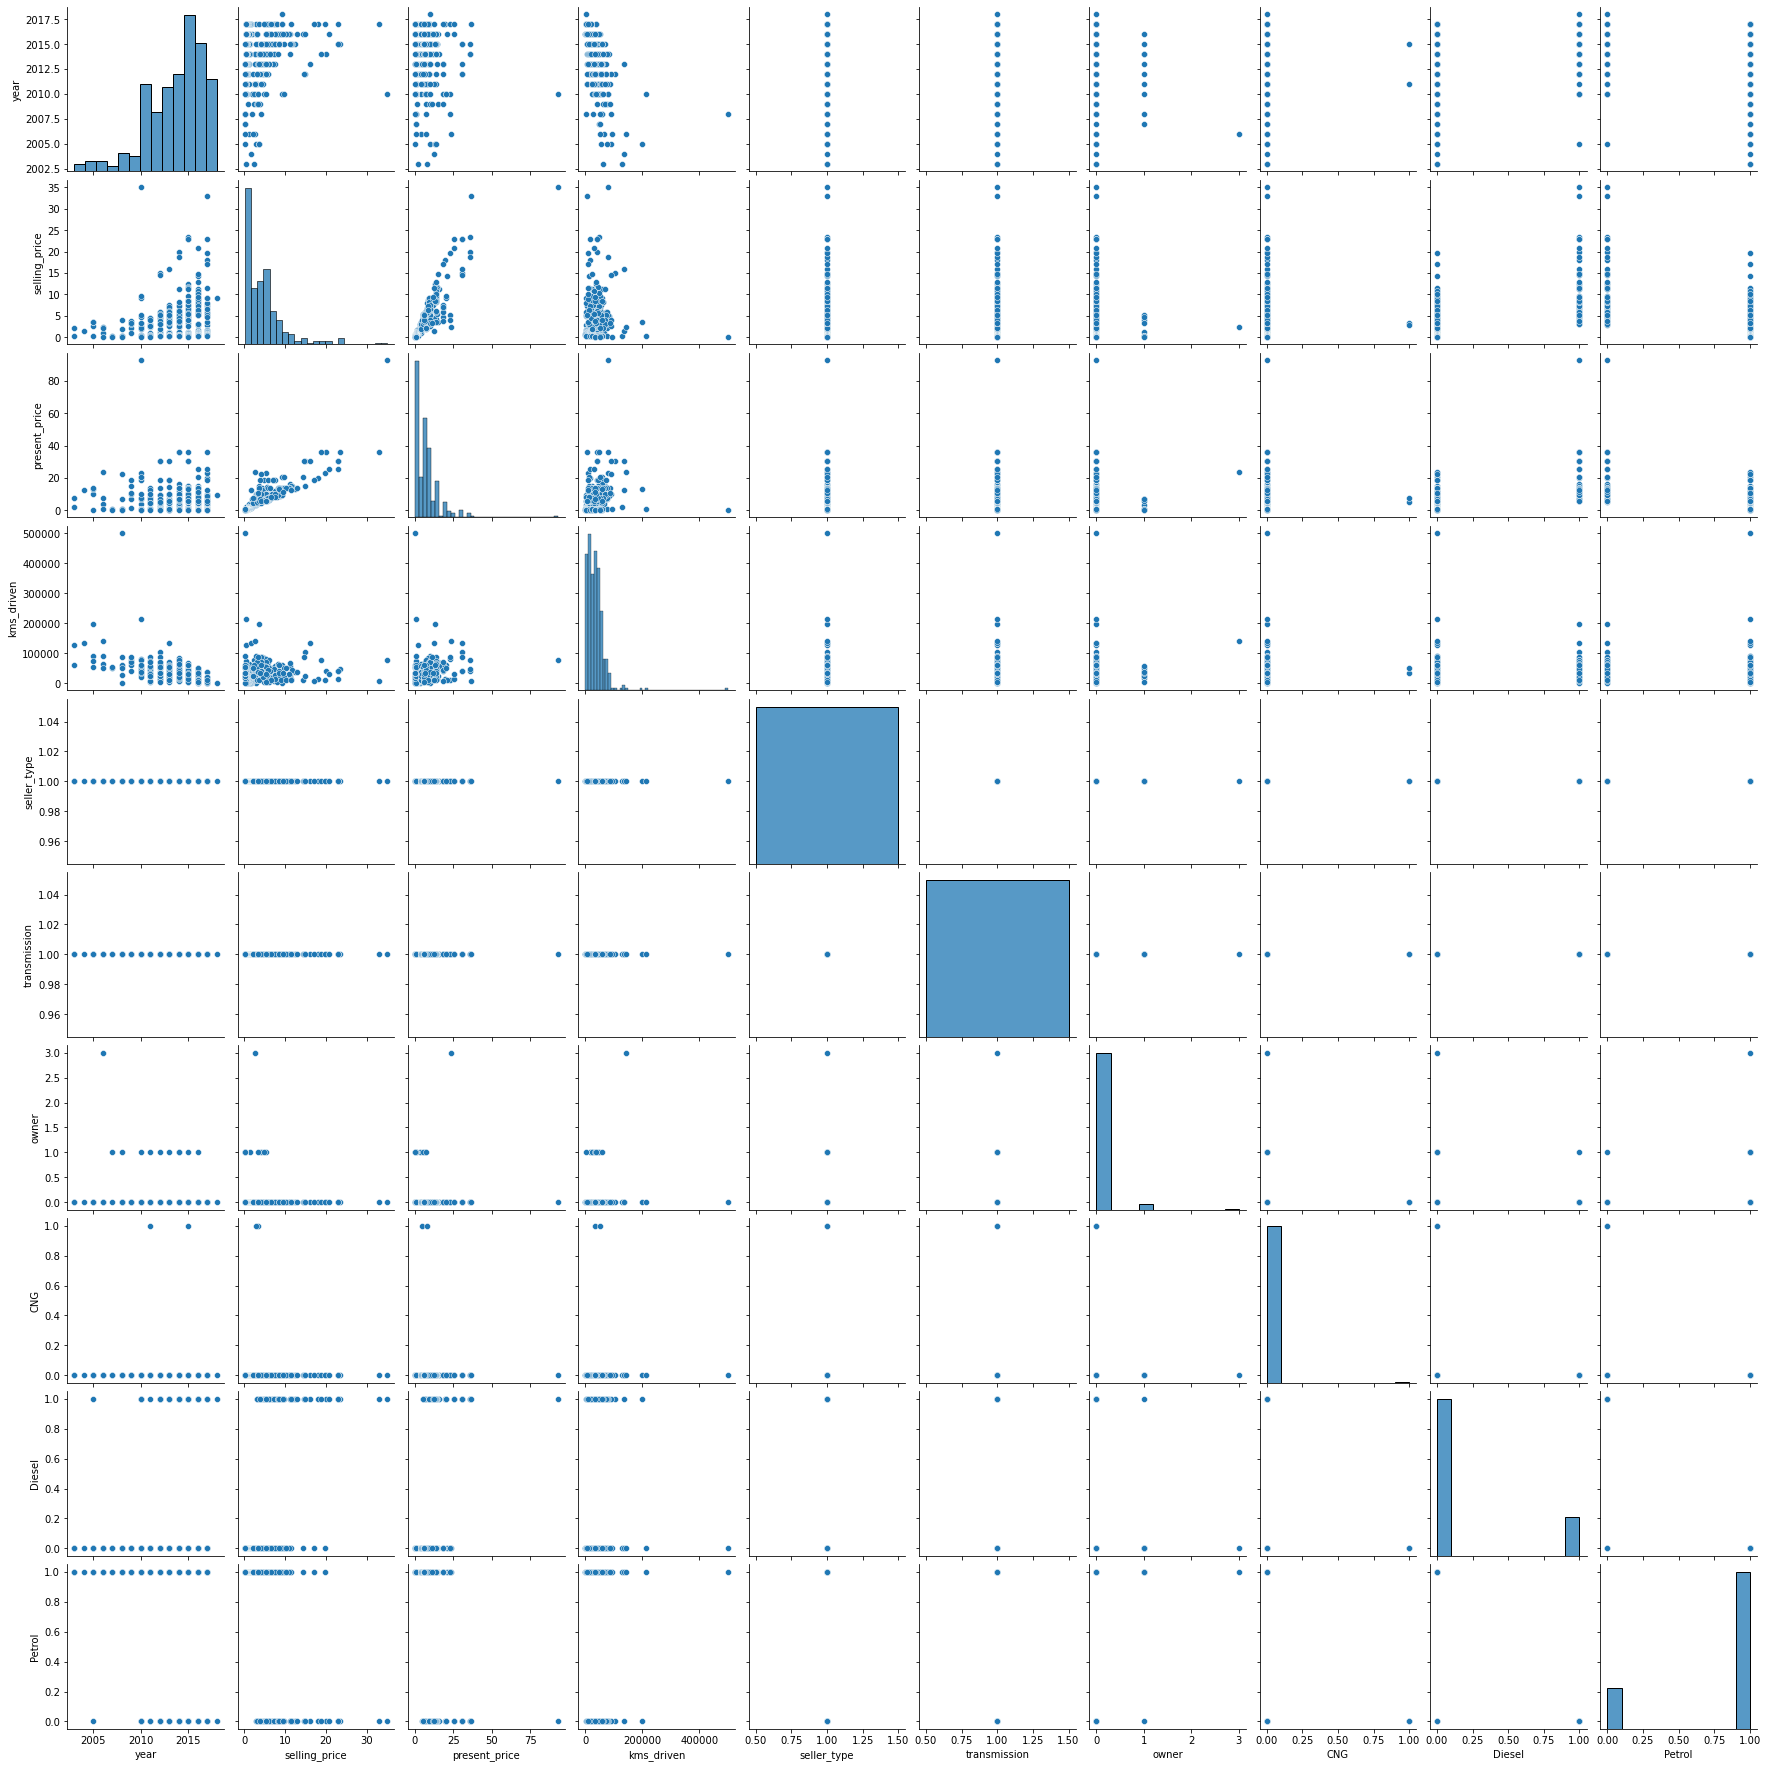

In [139]:
sns.pairplot(df);

In [142]:
y_pred = model.predict(X_test)

# Interpret the model

In [152]:
from scipy.stats import stats
from scipy.stats import probplot

In [ ]:
for i in df.drop(columns="sales").columns:
    print(i, skew(df[i]))   

In [ ]:
def check_dist(df, var):
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df, kde = True)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

In [ ]:
for col in df.drop("sales", axis =1).columns:
    check_dist(df, col)

In [ ]:
for i in df.drop(columns="sales").columns:
    print(i, skew(df[i]))   

In [146]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [147]:
y_train_pred = model.predict(X_train)

In [148]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8847020208388359
MAE 		: 1.327150029732899
MSE 		: 3.728821332829912
RMSE 		: 1.931015622109234


In [149]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.6839057922883063
MAE 		: 1.3302750425777918
MSE 		: 3.136533802286718
RMSE 		: 1.771026200338865


# Model Evaluation

In [ ]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [ ]:
eval_metric(y_test, y_pred)

In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
eval_metric(y_train, y_train_pred)

# Regularization

# Ridge

# Lasso

## Elastic-Net 